# Yeu cau 1

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train_small = x_train[:1000]
x_test_small = x_test[:200]

2025-09-30 23:41:47.054807: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-30 23:41:47.420700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759250507.543965   63138 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759250507.578516   63138 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759250507.855648   63138 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [23]:
angles = [0, 90, 180, 270]


def rotate_images(images, angles):
    rotated_images = []
    labels = []
    for img in images:
        for i, angle in enumerate(angles):
            rotated = tf.image.rot90(img, k=angle // 90)
            rotated_images.append(rotated.numpy())
            labels.append(i)
    return np.array(rotated_images), np.array(labels)


x_train_rot, y_train_rot = rotate_images(x_train_small, angles)
x_test_rot, y_test_rot = rotate_images(x_test_small, angles)

E0000 00:00:1759250516.496396   63138 cuda_executor.cc:1132] failed to query device memory info: INTERNAL: CUDA error: : CUDA_ERROR_ASSERT: device-side assert triggered


UnknownError: Failed to query available memory for GPU 0

In [ ]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(angles), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train_rot, y_train_rot, epochs=5, batch_size=64,
          validation_data=(x_test_rot, y_test_rot))

Epoch 1/5


I0000 00:00:1759241760.430980   45413 service.cc:152] XLA service 0x7fdd14018180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759241760.431138   45413 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-09-30 21:16:00.574485: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1759241760.947974   45413 cuda_dnn.cc:529] Loaded cuDNN version 90501


20/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4551 - loss: 1.1852

I0000 00:00:1759241768.060809   45413 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


57/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6150 - loss: 0.9197

2025-09-30 21:16:08.665770: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_250', 4 bytes spill stores, 4 bytes spill loads



63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.6325 - loss: 0.8869 - val_accuracy: 0.9212 - val_loss: 0.2818
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9178 - loss: 0.2502 - val_accuracy: 0.9425 - val_loss: 0.1826
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9596 - loss: 0.1308 - val_accuracy: 0.9575 - val_loss: 0.1190
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9665 - loss: 0.0956 - val_accuracy: 0.9237 - val_loss: 0.2064
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9683 - loss: 0.0946 - val_accuracy: 0.9625 - val_loss: 0.0947


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


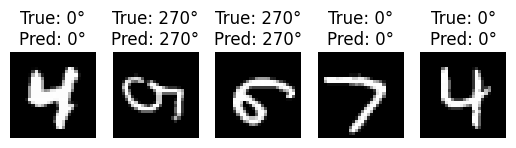

In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(x_test_rot)

num_examples = 5
indices = np.random.choice(len(x_test_rot), num_examples, replace=False)

for i, idx in enumerate(indices):
    img = x_test_rot[idx].squeeze()
    true_label = y_test_rot[idx]
    pred_label = np.argmax(predictions[idx])

    plt.subplot(1, num_examples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {angles[true_label]}°\nPred: {angles[pred_label]}°")
    plt.axis('off')

plt.show()

In [ ]:
(x_train_labeled, y_train_labeled), (x_test_labeled,
                                     y_test_labeled) = tf.keras.datasets.mnist.load_data()

x_train_labeled = x_train_labeled.astype('float32') / 255.
x_test_labeled = x_test_labeled.astype('float32') / 255.
x_train_labeled = np.expand_dims(x_train_labeled, -1)
x_test_labeled = np.expand_dims(x_test_labeled, -1)

x_train_fine = x_train_labeled[:1000]
y_train_fine = y_train_labeled[:1000]
x_test_fine = x_test_labeled[:200]
y_test_fine = y_test_labeled[:200]

In [ ]:
for layer in model.layers[:-2]:
    layer.trainable = False

model.pop()
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_fine, y_train_fine, epochs=5, batch_size=64,
          validation_data=(x_test_fine, y_test_fine))

Epoch 1/5


2025-09-30 21:16:48.887005: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_186', 4 bytes spill stores, 4 bytes spill loads



16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 384ms/step - accuracy: 0.1885 - loss: 3.5476 - val_accuracy: 0.5800 - val_loss: 1.3281
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6996 - loss: 1.0810 - val_accuracy: 0.7600 - val_loss: 0.7975
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8425 - loss: 0.5973 - val_accuracy: 0.8250 - val_loss: 0.6033
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8699 - loss: 0.4930 - val_accuracy: 0.8700 - val_loss: 0.4629
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9119 - loss: 0.3799 - val_accuracy: 0.8850 - val_loss: 0.3965


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


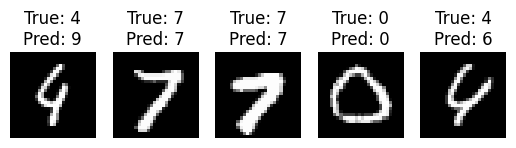

In [ ]:
predictions = model.predict(x_test_fine)

indices = np.random.choice(len(x_test_fine), 5, replace=False)

for i, idx in enumerate(indices):
    img = x_test_fine[idx].squeeze()
    true_label = y_test_fine[idx]
    pred_label = np.argmax(predictions[idx])

    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.show()

# Yeu cau 2

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image

def rotate_images(images, angles):
    rotated_images = []
    labels = []
    for img in images:
        for i, angle in enumerate(angles):
            rotated = torch.rot90(img, k=angle // 90, dims=[1, 2])
            rotated_images.append(rotated)
            labels.append(i)
    return torch.stack(rotated_images), torch.tensor(labels)



 # image net transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
import os
class HoaVNDatasetRotate(torch.utils.data.Dataset):
    def __init__(self, root_path, transform=None):
        self.transform = transform
        self.data, self.label = self.load_images(root_path, angels=[0, 90, 180, 270])
    
    
    def load_images(self, root_path, angels):
        imgs_path = []
        angel_label = []
        for label in os.listdir(root_path):
            label_path = os.path.join(root_path, label)
            for img in os.listdir(label_path):
                img_path = os.path.join(label_path, img)
                img = Image.open(img_path).convert("RGB")
                
                for i, angle in enumerate(angels):
                    rotated = img.rotate(angle)  # still PIL image
                    imgs_path.append(rotated)
                    angel_label.append(i)

        return imgs_path, angel_label

    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img =  self.data[idx]
        label = self.label[idx]
        if self.transform:
            img = self.transform(img)
        return img, label


In [10]:
train_dataset = HoaVNDatasetRotate(root_path="/home/anhkhoa/ComputerVisionPlus/data/HoaVietNam/train", transform=transform)
test_dataset = HoaVNDatasetRotate(root_path="/home/anhkhoa/ComputerVisionPlus/data/HoaVietNam/test", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)   # (224,224,1) -> (222,222,32)
        self.pool1 = nn.MaxPool2d(2, 2)                # (222,222,32) -> (111,111,32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)  # (111,111,32) -> (109,109,64)
        self.pool2 = nn.MaxPool2d(2, 2)                # (109,109,64) -> (54,54,64)
        
        self.flatten_dim = 64 * 54 * 54
        self.fc1 = nn.Linear(self.flatten_dim, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))   # Conv2D + ReLU
        x = self.pool1(x)           # MaxPool
        x = F.relu(self.conv2(x))   # Conv2D + ReLU
        x = self.pool2(x)           # MaxPool
        x = x.view(x.size(0), -1)   # Flatten
        x = F.relu(self.fc1(x))     # Dense + ReLU
        x = self.fc2(x)             # Dense (no softmax here)
        return x



# Pretraining

In [13]:
from tqdm import tqdm
epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=4).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)


for i in range(epochs):
    avg_loss = 0.0
    model.train()
    for images, labels in tqdm(train_loader, desc = 'Training'):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        avg_loss += loss.item() 
        loss.backward()
        optimizer.step()
    avg_loss /= len(train_loader)
    print(f"Epoch {i+1}/{epochs}, Training Loss: {avg_loss:.4f}")

    model.eval()
    correct = 0
    total = 0
    avg_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc = 'Testing'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            avg_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss /= len(test_loader)
    print(f"Epoch {i+1}/{epochs}, Testing Loss: {avg_loss:.4f}")

    print(f"Epoch {i+1}/{epochs}, Test Accuracy: {100 * correct / total:.2f}%")


Training: 100%|██████████| 19/19 [00:02<00:00,  7.73it/s]


Epoch 1/20, Training Loss: 1.5700


Testing: 100%|██████████| 7/7 [00:00<00:00, 10.72it/s]


Epoch 1/20, Testing Loss: 1.1195
Epoch 1/20, Test Accuracy: 54.00%


Training: 100%|██████████| 19/19 [00:02<00:00,  9.00it/s]


Epoch 2/20, Training Loss: 1.0376


Testing: 100%|██████████| 7/7 [00:00<00:00, 11.87it/s]


Epoch 2/20, Testing Loss: 0.8585
Epoch 2/20, Test Accuracy: 62.00%


Training: 100%|██████████| 19/19 [00:02<00:00,  9.29it/s]


Epoch 3/20, Training Loss: 0.8672


Testing: 100%|██████████| 7/7 [00:00<00:00, 11.91it/s]


Epoch 3/20, Testing Loss: 0.7781
Epoch 3/20, Test Accuracy: 64.50%


Training: 100%|██████████| 19/19 [00:02<00:00,  8.85it/s]


Epoch 4/20, Training Loss: 0.7200


Testing: 100%|██████████| 7/7 [00:00<00:00, 10.71it/s]


Epoch 4/20, Testing Loss: 0.7780
Epoch 4/20, Test Accuracy: 62.50%


Training: 100%|██████████| 19/19 [00:02<00:00,  9.01it/s]


Epoch 5/20, Training Loss: 0.6041


Testing: 100%|██████████| 7/7 [00:00<00:00, 10.79it/s]


Epoch 5/20, Testing Loss: 0.7850
Epoch 5/20, Test Accuracy: 63.50%


Training: 100%|██████████| 19/19 [00:02<00:00,  8.96it/s]


Epoch 6/20, Training Loss: 0.4707


Testing: 100%|██████████| 7/7 [00:00<00:00, 11.21it/s]


Epoch 6/20, Testing Loss: 0.8573
Epoch 6/20, Test Accuracy: 62.50%


Training: 100%|██████████| 19/19 [00:02<00:00,  9.38it/s]


Epoch 7/20, Training Loss: 0.3795


Testing: 100%|██████████| 7/7 [00:00<00:00, 11.28it/s]


Epoch 7/20, Testing Loss: 0.7086
Epoch 7/20, Test Accuracy: 67.50%


Training: 100%|██████████| 19/19 [00:02<00:00,  7.59it/s]


Epoch 8/20, Training Loss: 0.2873


Testing: 100%|██████████| 7/7 [00:00<00:00, 10.22it/s]


Epoch 8/20, Testing Loss: 0.7702
Epoch 8/20, Test Accuracy: 67.00%


Training: 100%|██████████| 19/19 [00:02<00:00,  8.10it/s]


Epoch 9/20, Training Loss: 0.2388


Testing: 100%|██████████| 7/7 [00:00<00:00, 10.25it/s]


Epoch 9/20, Testing Loss: 0.7482
Epoch 9/20, Test Accuracy: 65.50%


Training: 100%|██████████| 19/19 [00:02<00:00,  8.15it/s]


Epoch 10/20, Training Loss: 0.1683


Testing: 100%|██████████| 7/7 [00:00<00:00, 10.31it/s]


Epoch 10/20, Testing Loss: 0.7755
Epoch 10/20, Test Accuracy: 64.00%


Training: 100%|██████████| 19/19 [00:01<00:00, 16.34it/s]


Epoch 11/20, Training Loss: 0.1050


Testing: 100%|██████████| 7/7 [00:00<00:00, 10.73it/s]


Epoch 11/20, Testing Loss: 0.7955
Epoch 11/20, Test Accuracy: 65.00%


Training: 100%|██████████| 19/19 [00:02<00:00,  8.39it/s]


Epoch 12/20, Training Loss: 0.0760


Testing: 100%|██████████| 7/7 [00:00<00:00, 11.56it/s]


Epoch 12/20, Testing Loss: 1.0915
Epoch 12/20, Test Accuracy: 62.50%


Training: 100%|██████████| 19/19 [00:02<00:00,  8.42it/s]


Epoch 13/20, Training Loss: 0.0953


Testing: 100%|██████████| 7/7 [00:00<00:00, 11.22it/s]


Epoch 13/20, Testing Loss: 0.9556
Epoch 13/20, Test Accuracy: 63.50%


Training: 100%|██████████| 19/19 [00:02<00:00,  8.78it/s]


Epoch 14/20, Training Loss: 0.0600


Testing: 100%|██████████| 7/7 [00:00<00:00, 11.48it/s]


Epoch 14/20, Testing Loss: 0.8428
Epoch 14/20, Test Accuracy: 63.50%


Training: 100%|██████████| 19/19 [00:02<00:00,  9.06it/s]


Epoch 15/20, Training Loss: 0.0336


Testing: 100%|██████████| 7/7 [00:00<00:00, 10.66it/s]


Epoch 15/20, Testing Loss: 0.9323
Epoch 15/20, Test Accuracy: 63.50%


Training: 100%|██████████| 19/19 [00:02<00:00,  8.54it/s]


Epoch 16/20, Training Loss: 0.0244


Testing: 100%|██████████| 7/7 [00:00<00:00, 11.13it/s]


Epoch 16/20, Testing Loss: 0.9549
Epoch 16/20, Test Accuracy: 64.00%


Training: 100%|██████████| 19/19 [00:02<00:00,  8.53it/s]


Epoch 17/20, Training Loss: 0.0181


Testing: 100%|██████████| 7/7 [00:00<00:00, 10.42it/s]


Epoch 17/20, Testing Loss: 0.9549
Epoch 17/20, Test Accuracy: 64.00%


Training: 100%|██████████| 19/19 [00:02<00:00,  8.87it/s]


Epoch 18/20, Training Loss: 0.0119


Testing: 100%|██████████| 7/7 [00:00<00:00, 11.25it/s]


Epoch 18/20, Testing Loss: 0.9907
Epoch 18/20, Test Accuracy: 65.00%


Training: 100%|██████████| 19/19 [00:02<00:00,  8.70it/s]


Epoch 19/20, Training Loss: 0.0126


Testing: 100%|██████████| 7/7 [00:00<00:00, 10.05it/s]


Epoch 19/20, Testing Loss: 1.0332
Epoch 19/20, Test Accuracy: 65.00%


Training: 100%|██████████| 19/19 [00:02<00:00,  9.07it/s]


Epoch 20/20, Training Loss: 0.0074


Testing: 100%|██████████| 7/7 [00:00<00:00, 11.81it/s]

Epoch 20/20, Testing Loss: 1.0045
Epoch 20/20, Test Accuracy: 64.50%


# Fine tuning

In [14]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image

def rotate_images(images, angles):
    rotated_images = []
    labels = []
    for img in images:
        for i, angle in enumerate(angles):
            rotated = torch.rot90(img, k=angle // 90, dims=[1, 2])
            rotated_images.append(rotated)
            labels.append(i)
    return torch.stack(rotated_images), torch.tensor(labels)



 # image net transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
import os
class HoaVNDataset(torch.utils.data.Dataset):
    def __init__(self, root_path, transform=None):
        self.transform = transform
        self.data, self.label = self.load_images(root_path, angels=[0, 90, 180, 270])
    
    
    def convert_label(self, label):
        label_dict = {
            'Cuc' : 0,
            'Dao' : 1,
            'Lan' : 2,
            'Mai' : 3,
            'Tho' : 4
        }
        return label_dict[label]
    def load_images(self, root_path, angels):
        imgs_path = []
        angel_label = []
        for label in os.listdir(root_path):
            label_path = os.path.join(root_path, label)
            for img in os.listdir(label_path):
                img_path = os.path.join(label_path, img)
                img = Image.open(img_path).convert("RGB")
                
                imgs_path.append(img)
                angel_label.append(self.convert_label(label))

        return imgs_path, angel_label

    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img =  self.data[idx]
        label = self.label[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

train_dataset = HoaVNDataset(root_path="/home/anhkhoa/ComputerVisionPlus/data/HoaVietNam/train", transform=transform)
test_dataset = HoaVNDataset(root_path="/home/anhkhoa/ComputerVisionPlus/data/HoaVietNam/test", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [15]:
# Freeze toàn bộ
for param in model.parameters():
    param.requires_grad = False

# Chỉ train layer cuối
model.fc2 = nn.Linear(128, 5).to(device)
for param in model.fc2.parameters():
    param.requires_grad = True

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc2.parameters(), lr=0.001)

# ---------------------------
# Training loop
# ---------------------------
epochs = 20
for epoch in range(epochs):
    model.train()
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} - Training"):
        images, labels = images.to(device), labels.long().to(device)  # ép long
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc=f"Epoch {epoch+1}/{epochs} - Testing"):
            images, labels = images.to(device), labels.long().to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch+1}/{epochs}, Test Accuracy: {100 * correct / total:.2f}%")

Epoch 1/20 - Training:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 11.91it/s]


Epoch 1/20, Test Accuracy: 18.00%


Epoch 2/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 11.34it/s]


Epoch 2/20, Test Accuracy: 24.00%


Epoch 3/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]


Epoch 3/20, Test Accuracy: 20.00%


Epoch 4/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 11.51it/s]


Epoch 4/20, Test Accuracy: 30.00%


Epoch 5/20 - Testing: 100%|██████████| 2/2 [00:00<00:00,  9.76it/s]


Epoch 5/20, Test Accuracy: 22.00%


Epoch 6/20 - Testing: 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]


Epoch 6/20, Test Accuracy: 22.00%


Epoch 7/20 - Testing: 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]


Epoch 7/20, Test Accuracy: 16.00%


Epoch 8/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]


Epoch 8/20, Test Accuracy: 18.00%


Epoch 9/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 10.02it/s]


Epoch 9/20, Test Accuracy: 24.00%


Epoch 10/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 10.21it/s]


Epoch 10/20, Test Accuracy: 24.00%


Epoch 11/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 10.54it/s]


Epoch 11/20, Test Accuracy: 22.00%


Epoch 12/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 10.24it/s]


Epoch 12/20, Test Accuracy: 28.00%


Epoch 13/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]


Epoch 13/20, Test Accuracy: 28.00%


Epoch 14/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]


Epoch 14/20, Test Accuracy: 32.00%


Epoch 15/20 - Testing: 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]


Epoch 15/20, Test Accuracy: 34.00%


Epoch 16/20 - Testing: 100%|██████████| 2/2 [00:00<00:00,  8.77it/s]


Epoch 16/20, Test Accuracy: 40.00%


Epoch 17/20 - Testing: 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]


Epoch 17/20, Test Accuracy: 52.00%


Epoch 18/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 10.47it/s]


Epoch 18/20, Test Accuracy: 44.00%


Epoch 19/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 11.04it/s]


Epoch 19/20, Test Accuracy: 46.00%


Epoch 20/20 - Testing: 100%|██████████| 2/2 [00:00<00:00, 10.72it/s]

Epoch 20/20, Test Accuracy: 44.00%
